In [1]:
#Import necessary Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
##Load data
movie = pd.read_csv("movieLens.csv")
movie_data = np.array(movie)

In [3]:
movie.head()

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
X = movie_data[:,5:-1]

In [5]:
print(X.shape)

(1682, 18)


In [6]:
#Train Hierarchical Clustering trianing model

from sklearn.cluster import AgglomerativeClustering as HieClustering

clustering1 = HieClustering(n_clusters=5,linkage='ward').fit(X)
clustering1.labels_

array([3, 4, 2, ..., 0, 1, 0])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 0.7071067811865476, 0.7071067811865476, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.7071067811865476, 1.5811388300841898, 1.5811388300841898, 1.0]],
 'ivl': ['0', '1', '2', '3'],
 'leaves': [0, 1, 2, 3],
 'color_list': ['g', 'r', 'b']}

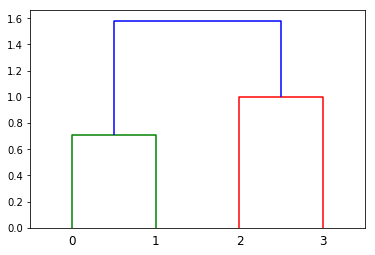

In [7]:
#Plot the dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

data = [[0., 0.], [0.5, 0.5], [0, 2], [1, 2]]

Den = linkage(data)
dendrogram(Den)

In [8]:
#Train k-means model

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000,init='k-means++').fit(X)
print(kmeans.labels_)

##For a new data point, predict which cluster it belongs to.
print(kmeans.predict([[1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,1]]))

##The center of each cluster
print(kmeans.cluster_centers_)

[2 3 4 ... 1 2 1]
[4]
[[ 7.69230769e-03 -6.10622664e-16  1.53846154e-01  1.07692308e-01
   2.11538462e-01  1.83186799e-15  6.92307692e-02  1.76923077e-01
   1.16573418e-15  2.69230769e-02  3.07692308e-02  1.80769231e-01
   9.61538462e-02  3.07692308e-02  1.50000000e-01  6.92307692e-02
  -6.10622664e-16  5.00000000e-02]
 [-9.54097912e-18  4.77759473e-02  1.48270181e-02 -2.91433544e-16
   2.80065898e-02  2.66453526e-15  5.10708402e-02  4.94233937e-03
   1.00000000e+00  6.58978583e-03  3.29489292e-03  8.23723229e-03
   1.48270181e-02  1.64744646e-02  1.36738056e-01  9.88467875e-03
   5.76606260e-02  5.60131796e-02]
 [-1.95156391e-18  3.88548057e-02  1.63599182e-02  2.04498978e-02
   8.38445808e-02  1.00000000e+00  2.45398773e-02  2.04498978e-03
   1.82004090e-01  1.43149284e-02  1.50920942e-16  2.24948875e-02
   4.08997955e-02  1.63599182e-02  1.92229039e-01  1.84049080e-02
   1.84049080e-02  2.24948875e-02]
 [-5.85469173e-18  1.00000000e+00  3.69458128e-01  1.47783251e-02
   4.43349754e-

In [9]:
##Load the breast cancer data set

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
Xb = breast_cancer.data 
print(Xb.shape)

(569, 30)


(569, 2)


Text(0, 0.5, 'second principal component')

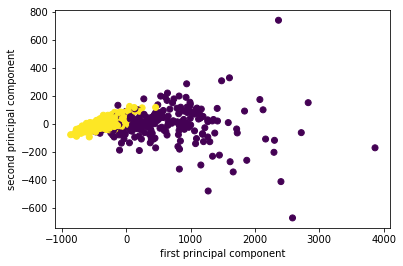

In [10]:
#Perform PCA analysis with number =f components to be 2

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xb)
print(X_pca.shape)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=breast_cancer.target)
plt.xlabel("first principal component")
plt.ylabel("second principal component")


[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-05
  -1.57042845e-04 -5.53071662e-05]]


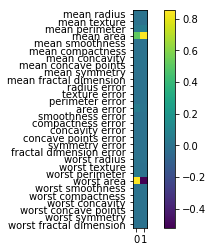

In [11]:
#Plot the coefficients for PCA
components = pca.components_
print(components)
plt.imshow(components.T)
plt.yticks(range(len(breast_cancer.feature_names)), breast_cancer.feature_names)
plt.colorbar()

Text(0, 0.5, 'second principal component')

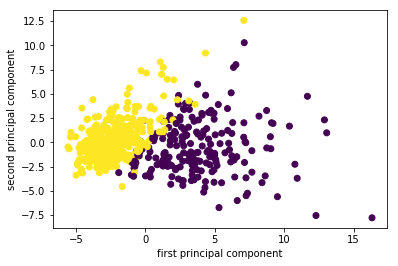

In [12]:
##PCA with scaled covariates

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(breast_cancer.data)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=breast_cancer.target)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


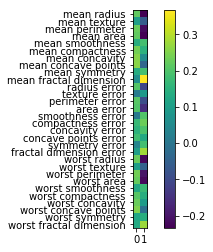

In [13]:
##Plot the PCA coefficients with scaled covariates
components2 = pca_scaled.named_steps['pca'].components_
plt.imshow(components2.T)
plt.yticks(range(len(breast_cancer.feature_names)), breast_cancer.feature_names)
plt.colorbar()
print(components2)


In [14]:
##PCA+Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, stratify=breast_cancer.target, random_state=0)
lr = LogisticRegression(C=1).fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9624413145539906
0.9370629370629371


/Users/rz26/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
##n_components=2

pca_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(C=1))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.9624413145539906
0.9230769230769231


/Users/rz26/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
##n_components=6

pca_lr2 = make_pipeline(StandardScaler(), PCA(n_components=6), LogisticRegression(C=1))
pca_lr2.fit(X_train, y_train)
print(pca_lr2.score(X_train, y_train))
print(pca_lr2.score(X_test, y_test))

0.9859154929577465
0.958041958041958


/Users/rz26/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
## F-value and p-value

from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler ##The scaling tool

boston = load_boston()
Xb = boston.data 
yb = boston.target
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    Xb, yb, random_state=0,test_size=0.25)

from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(Xb_train, yb_train)
print(f_values)
print(p_values)

[ 73.94468454  69.35659977 145.31490377   9.32331764  97.16903674
 358.63943918  77.31646962  31.00222706  78.61467013 130.84765167
 169.33755779  52.4883391  502.68107894]
[2.18041192e-16 1.53834059e-15 1.57925506e-28 2.42317039e-03
 1.51455111e-20 1.10224882e-56 5.25867488e-17 4.90462943e-08
 3.05052353e-17 3.26823438e-26 3.12072588e-32 2.46071291e-12
 2.33979209e-71]


In [18]:
#Select k covariates using f-value

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score

select = SelectKBest(k=2, score_func=f_regression)
select.fit(Xb_train, yb_train)
print(Xb_train.shape)
print(select.transform(Xb_train).shape)

(379, 13)
(379, 2)


In [19]:
#compare model of 2 variables and model of all features

all_features = make_pipeline(StandardScaler(), RidgeCV())
print(np.mean(cross_val_score(all_features, Xb_train, yb_train, cv=10)))
select_2 = make_pipeline(StandardScaler(),SelectKBest(k=2, score_func=f_regression), RidgeCV())
print(np.mean(cross_val_score(select_2, Xb_train, yb_train, cv=10)))

0.71795885107509
0.624362574916846


In [20]:
#use mutual information to select features

from sklearn.feature_selection import mutual_info_regression
MIscores = mutual_info_regression(Xb_train, yb_train,
                                discrete_features=[3])
print(MIscores)
select_3 = make_pipeline(StandardScaler(),SelectKBest(k=2, score_func=mutual_info_regression), RidgeCV())
np.mean(cross_val_score(select_3, Xb_train, yb_train, cv=10))

[0.33707742 0.19743965 0.53375953 0.00646745 0.45279576 0.56640244
 0.35561509 0.33089776 0.23444032 0.38254601 0.49711965 0.15159588
 0.6793122 ]


0.5894349088628841

In [21]:
##Recursive Feature Elimination

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xb_train)
Xb_train_scaled = scaler.transform(Xb_train)

rfe = RFE(LinearRegression(), n_features_to_select=1)##Select 1 model
rfe.fit(Xb_train_scaled, yb_train)
rfe.ranking_

array([ 9,  8, 13, 11,  5,  2, 12,  4,  7,  6,  3, 10,  1])

In [22]:
##Recursive Feature Elimination + Cross Validation
from sklearn.feature_selection import RFECV
rfe = RFECV(LinearRegression(), cv=10)
rfe.fit(Xb_train_scaled, yb_train)
print(rfe.support_)
print(boston.feature_names[rfe.support_])

[ True  True False  True  True  True False  True  True  True  True  True
  True]
['CRIM' 'ZN' 'CHAS' 'NOX' 'RM' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


In [23]:
pipe_rfe_ridgecv = make_pipeline(StandardScaler(),
                                 RFECV(LinearRegression(), cv=10), RidgeCV())
np.mean(cross_val_score(pipe_rfe_ridgecv, Xb_train_scaled, yb_train, cv=10))

0.710217843628811

In [24]:
#Include Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
pipe_rfe_ridgecv = make_pipeline(StandardScaler(), PolynomialFeatures(),RFECV(LinearRegression(), cv=10), RidgeCV())
np.mean(cross_val_score(pipe_rfe_ridgecv, Xb_train_scaled, yb_train, cv=10))

0.8412260511533421

In [25]:
##Wrapping method
from mlxtend.feature_selection import SequentialFeatureSelector
#We use the backward method, i.e., include all the features first and gradually remove them from the model.
sfs = SequentialFeatureSelector(LinearRegression(), forward=False, k_features=7)
sfs.fit(Xb_train_scaled, yb_train)

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
             floating=False, forward=False, k_features=7, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring=None, verbose=0)

In [26]:
#Print the index and model fitting result
print(sfs.k_feature_idx_)
print(boston.feature_names[np.array(sfs.k_feature_idx_)])
print(sfs.k_score_)

(1, 4, 5, 7, 9, 10, 12)
['ZN' 'NOX' 'RM' 'DIS' 'TAX' 'PTRATIO' 'LSTAT']
0.7250861222829649
